<a href="https://colab.research.google.com/github/WisudantyoWahyu/SISTEM-CERDAS/blob/main/classify_class_site_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [75]:
df = pd.read_csv('dataset2.csv')
# df = pd.read_excel("xxx.xls", sheet_name="sheet 1")
df.head()

,Site,Payload Total (GB),Traffic,Subs,Revenue,Class Rev
0,Site 1,30419,1765,1414,134017424,Gold
1,Site 2,13872,1685,731,62952270,Silver
2,Site 3,28531,1070,1206,120884649,Gold
3,Site 4,10777,911,761,54450496,Bronze
4,Site 5,10990,1418,934,53238883,Bronze


In [63]:
X = df.iloc[:,[1,2,3,4]].values
Y = df.iloc[:,[5]].values

In [ ]:
print(Y)

In [ ]:
print(X)

In [66]:
target_names = df['Class Rev'].unique()
print(target_names)

['Gold' 'Silver' 'Bronze' 'Diamond' 'Platinum']


In [67]:
print(X.shape)
print(Y.shape)

(593, 4)
(593, 1)


# **Artificial Neural Network**

In [68]:
# import the necessary packages
from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
# from keras.layers.core import Flatten
from keras.layers.core import Dense
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from PIL import Image
# from imutils import paths
# import numpy as np
# import os

In [69]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(Y)
print(labels)

[[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 ...
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]


In [70]:
(trainX, testX, trainY, testY) = train_test_split(X,	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(444, 4)
(149, 4)
(444, 5)
(149, 5)


In [71]:
#model ANN

model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(4,)), #hidden layer 1
        Dense(32, activation="relu"), #hidden layer 2
        Dense(16, activation="relu"),
        #Dense(8, activation="relu"),
        Dense(5, activation = "sigmoid"),
    ]
)

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                320       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 5)                 85        
                                                                 
Total params: 3,013
Trainable params: 3,013
Non-trainable params: 0
_________________________________________________________________


In [73]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-5, decay=1e-5 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=20)

[INFO] training network...
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


23/23 [==============================] - 1s 11ms/step - loss: 5063159.0000 - accuracy: 0.0541 - val_loss: 5115620.0000 - val_accuracy: 0.0268
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 4671042.0000 - accuracy: 0.0541 - val_loss: 4703434.5000 - val_accuracy: 0.0268
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 4279660.0000 - accuracy: 0.0541 - val_loss: 4288995.0000 - val_accuracy: 0.0268
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 3885660.2500 - accuracy: 0.0541 - val_loss: 3887966.5000 - val_accuracy: 0.0268
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 3499336.0000 - accuracy: 0.0541 - val_loss: 3480849.5000 - val_accuracy: 0.0268
Epoch 6/20
23/23 [==============================] - 0s 4ms/step - loss: 3104091.5000 - accuracy: 0.0541 - val_loss: 3072138.7500 - val_accuracy: 0.0268
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 2717715.0000 - accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


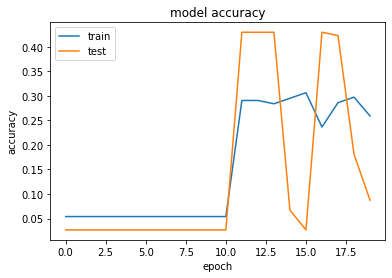

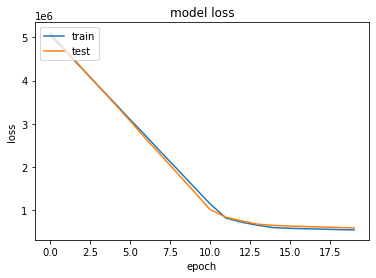

In [74]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()